In [39]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [41]:
import pandas as pd, numpy as np, datetime as dt, scipy
from pandas_datareader import data as pdr 
from scipy import stats
from scipy.stats import norm

## VaR for risk management
As soon as we open a position in the market, we are exposed to various types of
risks, such as volatility risk and credit risk. To preserve our trading capital as much
as possible, it is important to incorporate some form of risk management measures
to our trading system. Perhaps the most common measure of risk used in the financial industry is the VaR
technique. It is designed to simply answer: what is the worst expected amount of
loss, given a specific probability level, say 95 percent, over a certain period of time?
The beauty of VaR is that it can be applied to multiple levels, from position-specific
micro level to portfolio-based macro level.

In [42]:
scipy.stats.norm.ppf(0.95)

1.6448536269514722

In [43]:
# function for VaR
def VaR(initial_investment, σ, CI):
    return (initial_investment * σ * scipy.stats.norm.ppf(CI))   

initial_investment = float(100000) # Set an initial investment level
CI = 0.95 # confidence interval @ 95%
σ = 0.05  # assuming daily violatility 5%

VaR(initial_investment, σ, CI)

8224.268134757362

In [44]:
# import math

# initial_investment = float(100000) # Set an initial investment level
# confidence_interval = 0.95
# assuming stdDev = 20%
# σ = (0.2 / math.sqrt(252)) *100
# print('Daily volatility:', σ) # daily vilatility

# 1.25%

In [45]:
# assuming expected return = 9%
# expected_daily_ret = (0.09 / 252) * 100 
# print(expected_daily_ret)

# 0.036%

Interpretation: with a probability of 95% our expected loss for 1 day position will not exceed $ 8224.26

Let's approach VaR for a portfolio of multiple stocks.

The most important quality of portfolio variance is that its value is a weighted combination of the individual variances of each of the assets adjusted by their covariances. This means that the overall portfolio variance is lower than a simple weighted average of the individual variances of the stocks in the portfolio.

The formula for portfolio variance in a two-asset portfolio is as follows:

Portfolio variance = (w1^2)(σ1^2) + (w2^2)(σ2^2) + 2 * w1 * w2 * Cov1,2

Where:

- w1 = the portfolio weight of the first asset
- w2 = the portfolio weight of the second asset
- σ1= the standard deviation of the first asset
- σ2 = the standard deviation of the second asset
- Cov1,2 = the covariance of the two assets, Cov1,2 = the covariance of the two assets, which can thus be expressed as p(1,2)σ1σ2, where p(1,2) is the correlation coefficient between the two assets

In [46]:
w1 = 0.5
w2 = 0.5
σ1 = 0.07
σ2 = 0.05
corr = 0.4

variance = (w1 **2) * (σ1 **2) + (w2**2)*(σ2**2) + 2 * w1 * w2 * σ1*σ2*corr
σ = variance **(1/2) # volatility
print(σ); print()

# Now that we have eveything to calculate VaR
print('Value at risk:', VaR(initial_investment, σ, CI))

0.05049752469181039

Value at risk: 8306.103664139584


### Parametric VaR

In [47]:
VaR1 = VaR(initial_investment*w1, σ1, CI)
VaR2 = VaR(initial_investment*w2, σ2, CI)
vector = np.array([VaR1, VaR2])
print(vector)

[5756.98769433 4112.13406738]


In [48]:
corr_matrix = np.array([[1, corr], [corr,1]])
print(corr_matrix)

[[1.  0.4]
 [0.4 1. ]]


In [49]:
(np.dot(np.dot(vector, corr_matrix), vector))**(1/2)

8306.103664139586

## Import Data

We will download Adj close price

In [50]:
stocks = ['^RUT', '^GSPC', '^DJI', '^IXIC']
end = dt.datetime.now()
start = dt.datetime(end.year - 1, end.month, end.day)

# Download closing prices
data = pdr.get_data_yahoo(stocks, start=start, end=end)['Adj Close']

#From the closing prices, calculate periodic returns
returns = data.pct_change()
print('Returns dataframe:')
print(returns.tail()); print()

# Generate Var-Cov matrix
cov_matrix = returns.cov()
print('Covariance matrix:')
print(cov_matrix)

Returns dataframe:
Symbols         ^RUT     ^GSPC      ^DJI     ^IXIC
Date                                              
2021-05-17  0.001119 -0.002530 -0.001580 -0.003792
2021-05-18 -0.007292 -0.008517 -0.007782 -0.005636
2021-05-19 -0.007798 -0.002943 -0.004833 -0.000293
2021-05-20  0.006437  0.010555  0.005550  0.017745
2021-05-21  0.003402 -0.000784  0.003629 -0.004784

Covariance matrix:
Symbols      ^RUT     ^GSPC      ^DJI     ^IXIC
Symbols                                        
^RUT     0.000260  0.000139  0.000144  0.000149
^GSPC    0.000139  0.000119  0.000111  0.000137
^DJI     0.000144  0.000111  0.000123  0.000105
^IXIC    0.000149  0.000137  0.000105  0.000200


In [51]:
# set random weights for portfolio
weights = np.random.random(len(returns.columns))

# normalizing weights
weights /= np.sum(weights)

# Calculate mean returns for each stock
avg_rets = returns.mean()

# portfolio_returns = np.sum(avg_rets * weights) * Time
# print('Portfolio returns:', portfolio_returns); print()

# Generate Var-Cov matrix
cov_matrix = returns.cov()
print('Covariance matrix:')
print(cov_matrix); print()
 
# Calculate mean returns for portfolio overall, 
portfolio_mean = avg_rets @ weights
print('Expected daily return of our portfolio:', portfolio_mean); print()
 
# Calculate portfolio standard deviation
portfolio_std = np.sqrt(weights.T @ cov_matrix @ weights)
print('Expected daily volatility of our portfoli0:', portfolio_std); print()
 
# Calculate mean of investment
mean_investment = (1+portfolio_mean) * initial_investment
print('Average portfolio investement in absolute value:', mean_investment); print()
             
# Calculate standard deviation of investmnet
std_investment = initial_investment * portfolio_std
print('Average volatility of our investment in absolute value:', std_investment); print()

Covariance matrix:
Symbols      ^RUT     ^GSPC      ^DJI     ^IXIC
Symbols                                        
^RUT     0.000260  0.000139  0.000144  0.000149
^GSPC    0.000139  0.000119  0.000111  0.000137
^DJI     0.000144  0.000111  0.000123  0.000105
^IXIC    0.000149  0.000137  0.000105  0.000200

Expected daily return of our portfolio: 0.0014391387507770178

Expected daily volatility of our portfoli0: 0.011291176191446348

Average portfolio investement in absolute value: 100143.9138750777

Average volatility of our investment in absolute value: 1129.1176191446348



- Expected daily return of our portfolio:  0.14% 
- Expected std deviation = 1.13 % of our portfolio

## Normal distribution curve

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

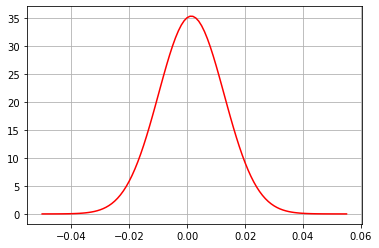

In [52]:
x = np.arange(-0.05, 0.055, 0.001)
norm_dist = norm.pdf(x, portfolio_mean, portfolio_std)

plt.plot(x, norm_dist, color='r')
plt.grid(True)
plt.show()

In [53]:
# confidence interval (95%)
CI = 0.05

VaR = norm.ppf(CI, portfolio_mean, portfolio_std)
print(VaR)

-0.017133193360271626


So, we have 05% confidence that, out portfolio will not loose > 1.7% in a day.

In [54]:
num_days = int(15)
VaR * np.sqrt(num_days)

-0.06635657255168351

Here we see that. in 15 days our portfolio will no loost > 6.64% of it's value.

Let us calculate the inverse of the normal cumulative distribution (PPF) with a specified confidence interval, standard deviation, and mean.

In [55]:
cut_off = norm.ppf(CI, mean_investment, std_investment)
print('Cut off value:', cut_off)

Cut off value: 98286.68066397285


In [56]:
historicalVaR = initial_investment - cut_off
print('Historical VaR:', historicalVaR)

Historical VaR: 1713.3193360271543


Here we are saying with 95% confidence that our portfolio of 100,000 USD will not exceed losses greater than $ 1765.13 over a one day period.

1 day VaR @ 95% confidence: 1713.32
2 day VaR @ 95% confidence: 2423.0
3 day VaR @ 95% confidence: 2967.56
4 day VaR @ 95% confidence: 3426.64
5 day VaR @ 95% confidence: 3831.1
6 day VaR @ 95% confidence: 4196.76
7 day VaR @ 95% confidence: 4533.02
8 day VaR @ 95% confidence: 4846.0
9 day VaR @ 95% confidence: 5139.96
10 day VaR @ 95% confidence: 5417.99
11 day VaR @ 95% confidence: 5682.44
12 day VaR @ 95% confidence: 5935.11
13 day VaR @ 95% confidence: 6177.46
14 day VaR @ 95% confidence: 6410.65
15 day VaR @ 95% confidence: 6635.66


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

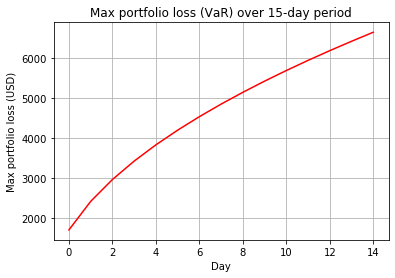

In [57]:
# Calculate n Day VaR
var_array = []
num_days = int(15)
for x in range(1, num_days+1):    
    var_array.append(np.round(historicalVaR * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(historicalVaR * np.sqrt(x),2)))

# Build plot
plt.xlabel("Day")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 15-day period")
plt.plot(var_array, "r")
plt.grid(True)
plt.show()

Conditional value at risk is derived from the value at risk for a portfolio or investment.
The use of CVaR as opposed to just VaR tends to lead to a more conservative approach in terms of risk exposure.